#unsupervised learning

We will look into two kinds of unsupervised learning in this chapter: transformations
of the dataset( dimensionality reduction) and clustering.

##Challenges in UL
- A major challenge in unsupervised learning is evaluating whether the algorithm
learned something useful. Unsupervised learning algorithms are usually applied to
data that does not contain any label information, so we don’t know what the right
output should be. Therefore, it is very hard to say whether a model “did well.”
- As a consequence, unsupervised algorithms are used often in an exploratory setting,
when a data scientist wants to understand the data better, rather than as part of a
larger automatic system. Another common application for unsupervised algorithms
is as a preprocessing step for supervised algorithms. Learning a new representation of
the data can sometimes improve the accuracy of supervised algorithms, or can lead to
reduced memory and time consumption

##Preprocessing and Scaling

In [8]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from IPython.display import display

In [10]:
pip install nltk spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install numpy scipy scikit-learn matplotlib pandas pillow graphviz mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
mglearn.plots.plot_scaling()

NameError: ignored

The following four plots show four different ways to transform the data that yield
more standard ranges:
- The StandardScaler in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magni‐
tude. However, this scaling does not ensure any particular minimum and maximum
values for the features.
- The RobustScaler works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the RobustScaler uses the median and quartiles,1
 instead of
mean and variance. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.
- The MinMaxScaler, on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis
between 0 and 1.
- the Normalizer does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

In [16]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [18]:
# transform data
X_train_scaled=scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
 X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
 X_train_scaled.max(axis=0)))


transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


NameError: ignored

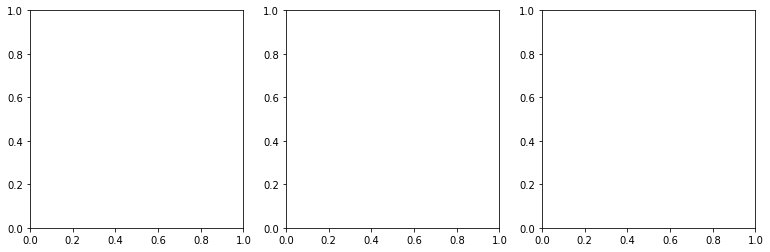

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
 marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)


fama fonction ta3l fit and transform at the same time.
While fit_transform is not necessarily more efficient for all models, it is still good
practice to use this method when trying to transform the training set.

##The Effect of Preprocessing on Supervised Learning

In [21]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))


Test set accuracy: 0.94


In [22]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
 svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [23]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
svm.fit(X_train,y_train)
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.63


##Dimensionality Reduction, Feature Extraction, and Manifold Learning

As we discussed earlier, transforming data using unsupervised learning can have
many motivations. The most common motivations are visualization, compressing the
data, and finding a representation that is more informative for further processing.
One of the simplest and most widely used algorithms for all of these is principal component analysis. We’ll also look at two other algorithms: non-negative matrix factorization (NMF), which is commonly used for feature extraction, and t-SNE, which is
commonly used for visualization using two-dimensional scatter plots.


###Principal Component Analysis (PCA)

In [24]:
mglearn.plots.plot_pca_illustration()

NameError: ignored

The first plot (top left) shows the original data points, colored to distinguish among
them. The algorithm proceeds by first finding the direction of maximum variance,
labeled “Component 1.” This is the direction (or vector) in the data that contains most
of the information, or in other words, the direction along which the features are most
correlated with each other. Then, the algorithm finds the direction that contains the
most information while being orthogonal (at a right angle) to the first direction. In
two dimensions, there is only one possible orientation that is at a right angle, but in
higher-dimensional spaces there would be (infinitely) many orthogonal directions.
Although the two components are drawn as arrows, it doesn’t really matter where the
head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right. The directions found using this pro‐
cess are called principal components, as they are the main directions of variance in the
data. In general, there are as many principal components as original features

NameError: ignored

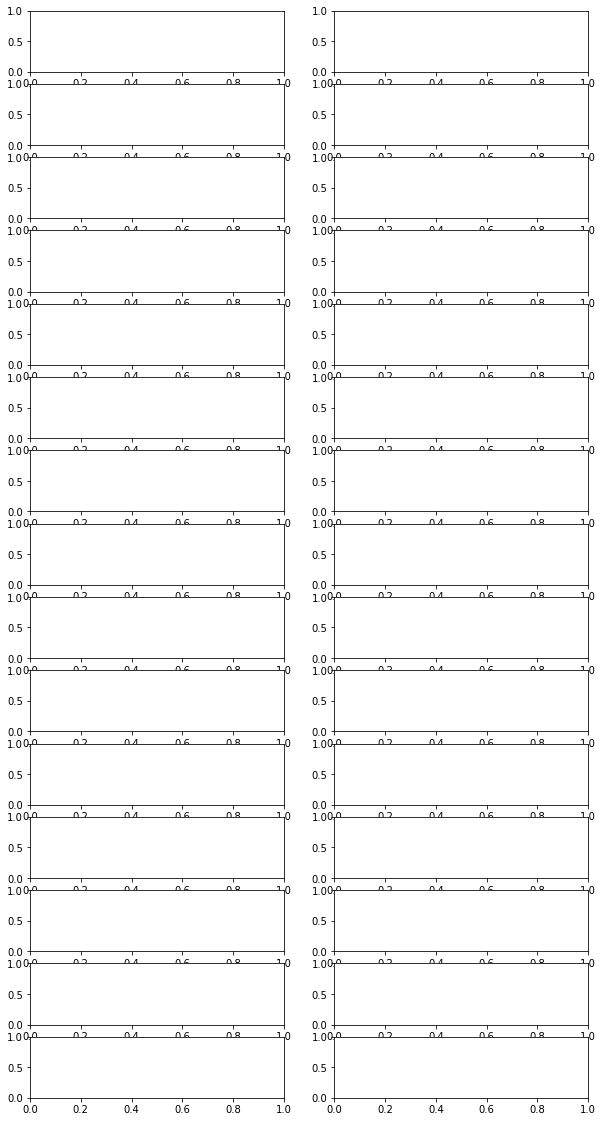

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Scaling brfore we use the PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("Original shape : {}",format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape : {} (50, 2)
Reduced shape: (50, 2)


In [27]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter((X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component"

SyntaxError: ignored

###weakness
A downside of PCA is that the two axes in the plot are often not very easy to interpret.
The principal components correspond to directions in the original data, so they are
combinations of the original features. However, these combinations are usually very
complex, as we’ll see shortly. The principal components themselves are stored in the
components_ attribute of the PCA object during fitting:

In [28]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


Text(0, 0.5, 'Principal components')

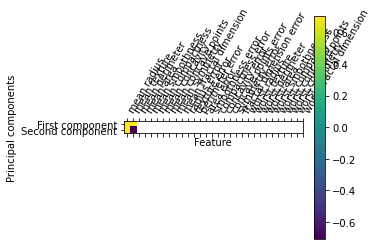

In [29]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

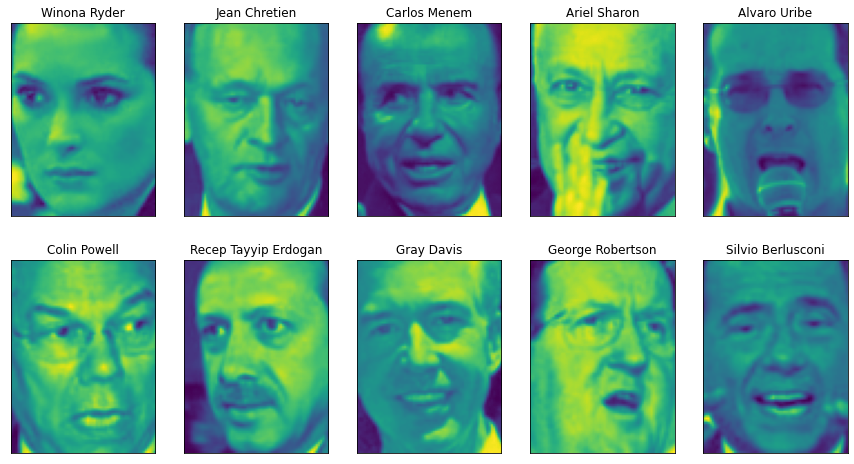

In [30]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])

##Eigenfaces for feature extraction

Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful

when cells are highly corrolated we claster them into group istead of creating axes for each cells with the principle component.
PCA is just one way to make sense of this type of data.there are lots of methods like the heatmaps t_SNE plots and Multi-dimensional scaling 

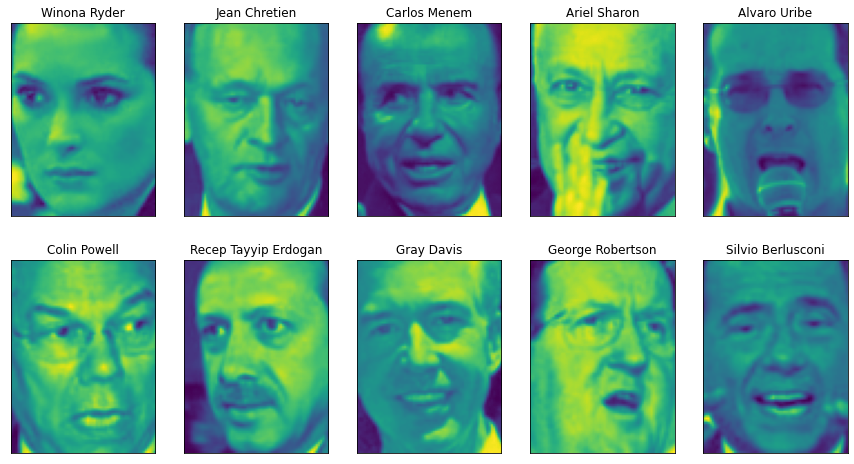

In [31]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])

In [32]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
 print("{0:25} {1:3}".format(name, count), end=' ')
 if (i + 1) % 3 == 0:
     print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [33]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
 X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [35]:
mglearn.plots.plot_pca_whitening()

NameError: ignored

###Transformation of data with PCA using whitening

In [36]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [39]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print(knn.score(X_test_pca,y_test))

0.312015503875969


##Non-Negative Matrix Factorization (NMF)

Aims to extract useful features

The process of decomposing data into a non-negative weighted sum is particularly
helpful for data that is created as the addition (or overlay) of several independent
sources, such as an audio track of multiple people speaking, or music with many
instruments. In these situations, NMF can identify the original components that
make up the combined data. Overall, NMF leads to more interpretable components
than PCA, as negative components and coefficients can lead to hard-to-interpret can‐
cellation effects. The eigenfaces in Figure 3-9, for example, contain both positive and
negative parts, and as we mentioned in the description of PCA, the sign is actually
arbitrary. Before we apply NMF to the face dataset, let’s briefly revisit the synthetic
data.


###Applying NMF to synthetic data

https://www.youtube.com/watch?v=AN6QOmWPD60

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape))
 ax.set_title("{}. component".format(i))

##Clustering
As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to clas‐
sification algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to.

In [5]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install pypl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 5.2 MB/s 


In [10]:
import mglearn

TypeError: ignored

In [3]:
mglearn.plots.plot_kmeans_boundaries()

NameError: ignored

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
#cluter the data into two clusters
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)
#plot the cluster assignments and cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:, 1],
 marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

NameError: ignored